# **PART = 1**

# **First of all lets import all the important library**

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Now lets connect the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lets read the csv file

In [ ]:
#load the full set of the data
data = pd.read_csv("/content/drive/MyDrive/AIML Program/Project/NLP1/Dataset+-+blogtext.csv")

# Shape of the dataset

In [ ]:
# check the shape of the data frame by using the shape attribute of the data frame
data.shape

(681284, 7)

# Lets check the sample of the dataset

In [ ]:
#check if the data frame is properly loaded using the sample() method
data.sample(5)

,id,gender,age,topic,sign,date,text
598826,2206507,female,23,indUnk,Taurus,"15,July,2004",How much are you like or unlike me?...
246678,1281160,male,24,Technology,Sagittarius,"13,August,2003",Wishing all bloggers a very happy I...
115422,3403444,female,14,indUnk,Taurus,"29,June,2004",Jumper991 (10:58:51 PM): ahh my whole ...
324759,3172762,male,16,Student,Scorpio,"01,August,2004",urlLink tea house&nbsp; urlLink
85300,1045289,female,25,Arts,Aquarius,"03,March,2003",It's been a mixed-up past few days. For th...


# **Initially we have taken the 5000 dataset from the whole data applied all the process on that. then we have taken whole but it was taking more than 24hrs to perform all the task. As we know that our method is working fine with the data set. That's why here we have taken only 1,00,000 data from the whole dataset. but still its taken 8hrs to perform all the task.**
# **So I have perform all the task on the 1,00,000 dataset**

In [ ]:
#blog_df=data
#blog_df =data.head(5000)
blog_df =data.head(100000)

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


# Lets again check the shape of the dataset

In [ ]:
blog_df.shape

(100000, 7)

In [ ]:
#check if the last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


# Basic info about data columns and its type

In [ ]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


# Lets check the gender ratio

In [ ]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

# Lets check the null values in the dataset

In [ ]:
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# There are no  null values in the dataset. So now lets visualize the dataset to get some understanding about the dataset

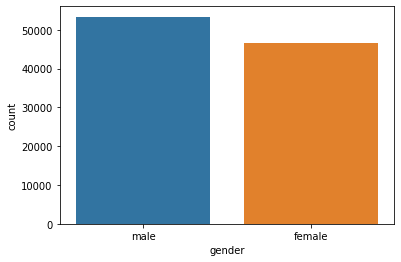

In [ ]:
sns.countplot(x='gender',data=blog_df)

# Lets visualize the sign by count plot

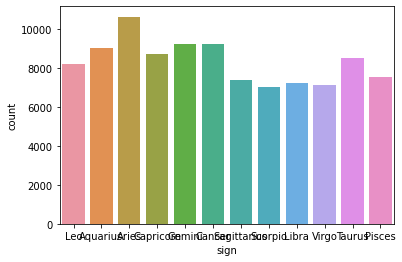

In [ ]:
sns.countplot(x='sign',data=blog_df)

In [ ]:
#chceck for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# **As we know that all the text that we have in the dataset. will not be only English language.SO our model will not be able to understand other language so we need to delete other text that belong other than English language . **

# **For that here we are using Langdetect library**

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

def detect_english(text):
     try:
        return detect(text) == 'en'
     except:
         return False

In [ ]:
blog_df = blog_df[blog_df['text'].apply(detect_english)]

# so we have deleted the non-english sentence. Now lets check the shape of the dataset after deleting that

In [ ]:
blog_df.shape

(95551, 7)

# here we can see that initially we had 1,00,000 dataset. after deleting non-english text. Now we have 95,551 texts

# now lets remove unwanted chars other than alphanumeric

In [ ]:

pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [ ]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...


# Now lets covert text to lower part for further processing

In [ ]:

blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [ ]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",i had an interesting conversation...


# So, now lets remove unwanted spaces

In [ ]:

blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",i had an interesting conversation with my dad ...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Now we need to remove the stopwords from the text

In [ ]:

stopwords=set(stopwords.words('english'))

In [ ]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",interesting conversation dad morning talking k...


# As we can see here that id and date columns are not playing major role here. Thats why we can drop that columns

In [ ]:

blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [ ]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...
5,male,33,InvestmentBanking,Aquarius,interesting conversation dad morning talking k...


In [ ]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
5,male,33,InvestmentBanking,Aquarius,interesting conversation dad morning talking k...,"[male, 33, InvestmentBanking, Aquarius]"


# **Now lets drop  gender,age,topic & sign as they are already merged to labels column**

In [ ]:
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [ ]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
5,interesting conversation dad morning talking k...,"[male, 33, InvestmentBanking, Aquarius]"


# **Now lets define x and y value to train the model for traing and testing**

In [ ]:
X= blog_df.text
y = blog_df.labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(76440,)
(76440,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(19111,)
(19111,)


In [ ]:
X_test

568      today eldest turning 14 though mothers suppose...
80720    event andrea bocellis concert venue singapore ...
28888    ahjust doctor ordered long holiday rest really...
21165    idea happened hmm whatever im sorry ya goes yo...
80381    ok verdict im going send care package figure g...
                               ...                        
45629    another weekend another wasted couple days har...
22278    lust passion sensuality love think extremely i...
88175    urllink macromedia edge rich clients internet ...
81692    waiting foodits least five minutes since last ...
25729    yesterday began first week going dance classes...
Name: text, Length: 19111, dtype: object

# So here we are going to use CountVectorizer and then we'll feed data to countvectorizer

In [ ]:
cvect = CountVectorizer(ngram_range=(1,2))

# Now also check the vocablury size and feed the data

In [ ]:

cvect.fit(X_train)


len(cvect.vocabulary_)

4444810

In [ ]:
cvect.get_feature_names()

['00',
 '00 04',
 '00 damn',
 '00 dodge',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 duke',
 '00 games',
 '00 laughed',
 '00 mark',
 '00 match',
 '00 morning',
 '00 one',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 cheers',
 '000 chunk',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 trees',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 fontsize',
 '000000 zero',
 '00000000345',
 '00000000345 secs',
 '00000

In [ ]:
X_train_ct = cvect.transform(X_train)

In [ ]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [ ]:
X_train_ct

<76440x4444810 sparse matrix of type '<class 'numpy.int64'>'
	with 13786889 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_ct[0]

<1x4444810 sparse matrix of type '<class 'numpy.int64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_ct = cvect.transform(X_test)

In [ ]:
X_test_ct

<19111x4444810 sparse matrix of type '<class 'numpy.int64'>'
	with 2565179 stored elements in Compressed Sparse Row format>

In [ ]:
cvect.get_feature_names()[:10]

['00',
 '00 04',
 '00 damn',
 '00 dodge',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 duke',
 '00 games',
 '00 laughed']

In [ ]:
print(X_train_ct)

  (0, 305895)	1
  (0, 306046)	1
  (0, 604065)	1
  (0, 606276)	1
  (0, 643864)	2
  (0, 643909)	1
  (0, 643910)	1
  (0, 757318)	1
  (0, 757396)	1
  (0, 940467)	1
  (0, 941237)	1
  (0, 1156172)	1
  (0, 1156338)	1
  (0, 1240948)	1
  (0, 1241133)	1
  (0, 1321155)	1
  (0, 1321837)	1
  (0, 1361907)	1
  (0, 1361983)	1
  (0, 1400225)	1
  (0, 1472813)	1
  (0, 1474513)	1
  (0, 1518783)	1
  (0, 1521819)	1
  (0, 1524902)	1
  :	:
  (76439, 3442378)	1
  (76439, 3764150)	1
  (76439, 3764184)	1
  (76439, 3885617)	3
  (76439, 3888083)	1
  (76439, 3891000)	1
  (76439, 3892047)	1
  (76439, 3900393)	1
  (76439, 3901925)	1
  (76439, 3971700)	1
  (76439, 3972550)	1
  (76439, 4025678)	1
  (76439, 4026570)	1
  (76439, 4092128)	1
  (76439, 4092150)	1
  (76439, 4131217)	1
  (76439, 4133761)	1
  (76439, 4136194)	1
  (76439, 4136266)	1
  (76439, 4200938)	1
  (76439, 4201179)	1
  (76439, 4242919)	1
  (76439, 4242989)	1
  (76439, 4412884)	1
  (76439, 4412918)	1


In [ ]:
print(X_test_ct)

  (0, 17624)	1
  (0, 18137)	1
  (0, 85760)	1
  (0, 85857)	1
  (0, 86725)	1
  (0, 86850)	1
  (0, 175691)	1
  (0, 176287)	1
  (0, 223197)	1
  (0, 247551)	1
  (0, 260912)	1
  (0, 302962)	1
  (0, 303308)	1
  (0, 409110)	3
  (0, 409114)	1
  (0, 438933)	1
  (0, 441388)	1
  (0, 462607)	1
  (0, 534006)	1
  (0, 534701)	1
  (0, 542678)	1
  (0, 604065)	1
  (0, 604124)	1
  (0, 705948)	2
  (0, 706893)	1
  :	:
  (19110, 4232197)	1
  (19110, 4247535)	1
  (19110, 4247735)	1
  (19110, 4248963)	2
  (19110, 4250139)	1
  (19110, 4250643)	1
  (19110, 4271698)	3
  (19110, 4273321)	1
  (19110, 4274847)	1
  (19110, 4288260)	2
  (19110, 4288580)	1
  (19110, 4288628)	1
  (19110, 4295070)	3
  (19110, 4295533)	1
  (19110, 4295858)	1
  (19110, 4296863)	1
  (19110, 4385046)	1
  (19110, 4386031)	1
  (19110, 4415166)	1
  (19110, 4416609)	1
  (19110, 4418510)	1
  (19110, 4418730)	1
  (19110, 4421181)	1
  (19110, 4434071)	1
  (19110, 4434433)	1


# **Now we have done all the required step till now. So now we'll create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. **

In [ ]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [ ]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 511,
 'Advertising': 682,
 'Agriculture': 154,
 'Aquarius': 8770,
 'Architecture': 76,
 'Aries': 10072,
 'Arts': 4871,
 'Automotive': 124,
 'Banking': 337,
 'Biotech': 321,
 'BusinessServices': 607,
 'Cancer': 8832,
 'Capricorn': 8239,
 'Chemicals': 263,
 'Communications-Media': 2603,
 'Construction': 240,
 'Consulting': 844,
 'Education': 5348,
 'Engineering': 2219,
 'Environment': 5,
 'Fashion': 1830,
 'Gemini': 8660,
 'Government': 1967,
 'HumanResources': 203,
 'Internet': 2047,
 'InvestmentBanking': 240,
 'Law': 340,
 'LawEnforcement-Security': 359,
 'Leo': 7860,
 'Libra': 6959,
 'Manufacturing': 536,
 'Maritime': 59,
 'Marketing': 690,
 'Military': 765,
 'Museums-Libraries': 301,
 'Non-Profit': 1289,
 'Pisces'

# **Now lets Transform the labels for this purpose, it is convenient to use MultiLabelBinarizer from sklearn to Convert your train and test labels using MultiLabelBinarizer**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
y_train = binarizer.fit_transform(y_train)

In [ ]:
y_test = binarizer.transform(y_test)

In [ ]:
y_test

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
y_train

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

# **Now we need to Choose a classifier**
# In this task, we are using the OnevsRest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier,we are using LogisticRegression becaues It is one of the simplest methods.



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
Ypred=model.predict(X_test_ct)

In [ ]:
Ypred

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
y_test

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# here we have taken the different avg methods i.e. Micro, Macro and weighted to see the performance of all

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    
    

# Now lets check the performance by micro average

In [ ]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.10847156088116791
F1 score: Micro 0.4827356685248356
Average precision score: Micro 0.2925989193533145
Average recall score: Micro 0.35419391973209147


# Now lets check the performance by macro average

In [ ]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.10847156088116791
F1 score: Macro 0.1561410896538983
Average recall score: MAcro 0.10307777222703644


# Now lets check the performance by weighted average

In [ ]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.10847156088116791
F1 score: weighted 0.44049184447605555
Average precision score: weighted 0.39094276398000233
Average recall score: weighted 0.35419391973209147


# Here we can see that accuracy score through all the methods are same i.e.0.1084 apprx.
# But F1 score by micro avg is highest (0.48) while lowest by macro avg i.e. 0.15
# Avg precision score is highest by weighted average i.e. 0.39
# While recall score was same by micro and weighted average and that is 0.35

# **Now lets Print true label and predicted label for any five examples**

In [ ]:
preds = Ypred[:15]
actuals = y_test[:15]

In [ ]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Sagittarius', 'female', 'indUnk'),
 ('Banking', 'Taurus', 'male'),
 ('Scorpio', 'indUnk', 'male'),
 ('Student', 'Taurus', 'male'),
 ('Libra', 'female', 'indUnk'),
 ('Libra', 'Student', 'female'),
 ('Sagittarius', 'Student', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Virgo', 'female', 'indUnk'),
 ('Pisces', 'Student', 'female'),
 ('Aries', 'female', 'indUnk'),
 ('Student', 'Taurus', 'male'),
 ('Sagittarius', 'Student', 'female'),
 ('Gemini', 'female', 'indUnk'),
 ('Aries', 'Communications-Media', 'male')]

In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('female', 'indUnk'),
 ('male',),
 ('male',),
 ('female',),
 ('Student', 'female', 'indUnk'),
 ('Student', 'female'),
 ('male',),
 (),
 ('indUnk', 'male'),
 ('indUnk',),
 ('Aries', 'female', 'indUnk'),
 ('female', 'indUnk'),
 ('male',),
 ('Gemini', 'female', 'indUnk'),
 ()]

# Print true label and predicted label for any five examples¶

In [ ]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('Student', 'male')
('Pisces', 'indUnk', 'male')


In [ ]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

('male',)
('Aries', 'Technology', 'male')


In [ ]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('female',)
('Leo', 'indUnk', 'male')


In [ ]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('male',)
('Cancer', 'Student', 'female')


In [ ]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('female',)
('Cancer', 'Engineering', 'female')


# Print true label and predicted label for any five examples

In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[5908, 9704, 5977, 15923, 15898]
('Sagittarius', 'female')
('Sagittarius', 'female', 'indUnk')
()
('Aries', 'Technology', 'male')
('female',)
('Leo', 'Student', 'female')
('female',)
('Publishing', 'Scorpio', 'female')
('female',)
('Accounting', 'Gemini', 'female')


In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 17624)	1
  (0, 18137)	1
  (0, 85760)	1
  (0, 85857)	1
  (0, 86725)	1
  (0, 86850)	1
  (0, 175691)	1
  (0, 176287)	1
  (0, 223197)	1
  (0, 247551)	1
  (0, 260912)	1
  (0, 302962)	1
  (0, 303308)	1
  (0, 409110)	3
  (0, 409114)	1
  (0, 438933)	1
  (0, 441388)	1
  (0, 462607)	1
  (0, 534006)	1
  (0, 534701)	1
  (0, 542678)	1
  (0, 604065)	1
  (0, 604124)	1
  (0, 705948)	2
  (0, 706893)	1
  :	:
  (0, 3762192)	1
  (0, 3856685)	2
  (0, 3859643)	1
  (0, 3860057)	1
  (0, 3872008)	1
  (0, 3873434)	1
  (0, 3875443)	3
  (0, 3877129)	1
  (0, 3878727)	1
  (0, 3885617)	1
  (0, 3891000)	1
  (0, 3900393)	1
  (0, 3902408)	1
  (0, 3943771)	1
  (0, 3944704)	1
  (0, 3950473)	1
  (0, 4045813)	1
  (0, 4045818)	1
  (0, 4215154)	1
  (0, 4215219)	1
  (0, 4344576)	1
  (0, 4349298)	1
  (0, 4368245)	2
  (0, 4369854)	1
  (0, 4371133)	1
True labels:	Sagittarius,female,indUnk
Predicted labels:	female,indUnk


Text:	  (0, 84352)	1
  (0, 221224)	1
  (0, 331446)	1
  (0, 335631)	1
  (0, 339392)	1
  (0, 49974

# Now lets Use a linear classifier wrap it up in OneVsRestClassifier to train it on every label. here we have used LinearSVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

# So now here we are going to use lr,svm and nbayes to check the performance from all

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    display_metrics_macro(y_test,Ypred)
    display_metrics_weighted(y_test,Ypred)    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.1524253047982837
F1 score: Micro 0.5136967906539546
Average precision score: Micro 0.3093693458044488
Average recall score: Micro 0.40034535084506306




Accuracy score:  0.1524253047982837
F1 score: Macro 0.2277611887366878
Average recall score: MAcro 0.16537245546901702




Accuracy score:  0.1524253047982837
F1 score: weighted 0.4917753556667853
Average precision score: weighted 0.40863160250305475
Average recall score: weighted 0.40034535084506306






#** Here we have used lr,svm and nbayes models to see the performance. as we can see here that-**
# Accuracy score by all methods are same i.e. 0.15
# F1 score is highest by micro 0.5169
# while precision score is highest by weighted avg
# and highest recall score is 0.40 by Micro and weighted average


# **Conclussion:**

# 1. Here we have solved Multilabel classification problem that predicts multiple features of the author of a given text.

# 2. Also we have Loaded the data and done some basic EDA 

# 3. Then we have done data cleansing i.e. removed the unnecessary chars, removed the spaces, converted the case to lower and also removed the stop words, vectorized the features as well

# 4. then we have splitted the data for training and testing

# 5. Then we have used the multilable binarizers, and calculated the accuracy, f1 score, Avg precision and recall scores for each 

## **PART = 2** chatbot 

# Lets connect the path of file

In [3]:
%cd /content/drive/MyDrive/AIML Program/Project/NLP1

/content/drive/MyDrive/AIML Program/Project/NLP1


# Now lets  import the required library

In [4]:
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

## create an object of WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()


## importing the GL Bot corpus file for pre-processing

In [ ]:

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("/content/drive/MyDrive/AIML Program/Project/NLP1/GL Bot.json").read()
intents = json.loads(data_file)

In [5]:
# preprocessing the json data
# tokenization
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Now lets do some preprocessing i.e. lemmatize, lower each word and remove duplicates

In [6]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

## creating a pickle file to store the Python objects which we will use while predicting

In [ ]:
pickle.dump(words,open('words.pkl','wb')) 
pickle.dump(classes,open('classes.pkl','wb'))

# **Now lets create the trainind data**

In [7]:
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
   
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle features and converting it into numpy arrays
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

## Create NN model to predict the responses

In [8]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot.h5', hist) # we will pickle this model to use in the future
print("\n")
print("*"*50)
print("\nModel Created Successfully!")

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 2.0632 - accuracy: 0.1953 
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 1.9104 - accuracy: 0.2188
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 1.8277 - accuracy: 0.2578
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 1.7627 - accuracy: 0.3438
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6392 - accuracy: 0.4375
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5799 - accuracy: 0.4062
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 1.4153 - accuracy: 0.4922
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 1.2388 - accuracy: 0.6094
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 1.1570 - accuracy: 0.5625
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 0.9799 - accuracy: 0.6797
Epoch 11

# Now lets load the saved model file

In [9]:
model = load_model('chatbot.h5')
intents = json.loads(open("/content/drive/MyDrive/AIML Program/Project/NLP1/GL Bot.json").read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [10]:
def clean_up_sentence(sentence):

    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words


# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):

    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)

    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
               
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
   
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    error = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>error]
    
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

# Now lets create function to get the response from the model

In [11]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

# function to predict the class and get the response

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

# Now we are going to create a function to start the chat bot which will continue till the user type 'end'

In [12]:
def start_chat():
    print("Bot: This is Sophie! Your Personal Assistant.\n\n")
    while True:
        inp = str(input()).lower()
        if inp.lower()=="end":
            break
        if inp.lower()== '' or inp.lower()== '*':
            print('Please re-phrase your query!')
            print("-"*50)
        else:
            print(f"Bot: {chatbot_response(inp)}"+'\n')
            print("-"*50)

In [13]:
# start the chat bot
start_chat()

Bot: This is Sophie! Your Personal Assistant.


hi
Bot: Hello! how can i help you ?

--------------------------------------------------
how are you
Bot: Hello! how can i help you ?

--------------------------------------------------
I want to learn about data science
Bot: Hello! how can i help you ?

--------------------------------------------------
machine learning
Bot: Link: Machine Learning wiki 

--------------------------------------------------
deep learning
Bot: Link: Neural Nets wiki

--------------------------------------------------
nlp
Bot: Link: Machine Learning wiki 

--------------------------------------------------
can't see
Bot: I hope I was able to assist you, Good Bye

--------------------------------------------------
deep learning
Bot: Link: Neural Nets wiki

--------------------------------------------------
bye
Bot: Link: Machine Learning wiki 

--------------------------------------------------
end


# **As we can see above that our chatbot is working pretty well. Its taking all questions and giving the response as we have defined in the corpus file. And bot got stopped when we have send the 'end' input as we have defined in the algorithms. **
# **So we can say, this is a good bot and working fine.**